## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
#1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

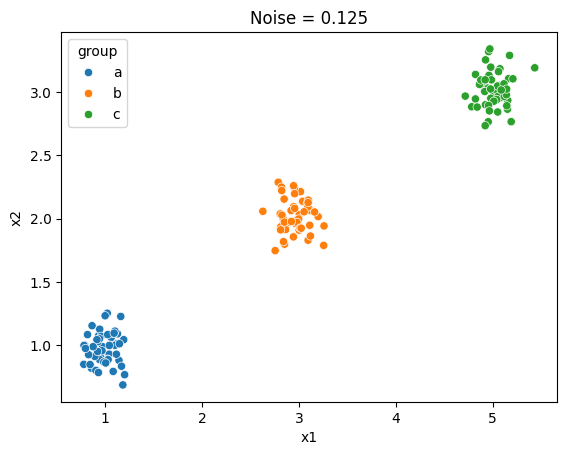

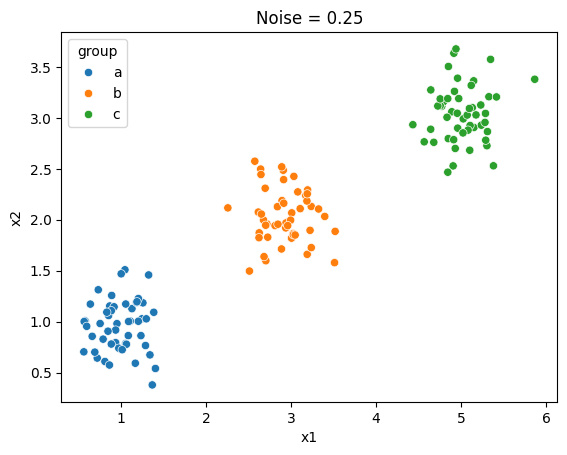

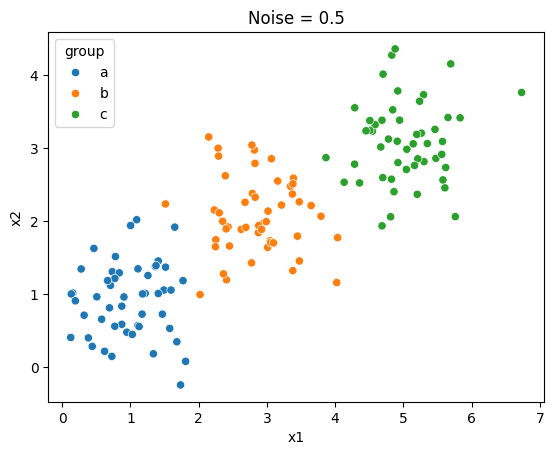

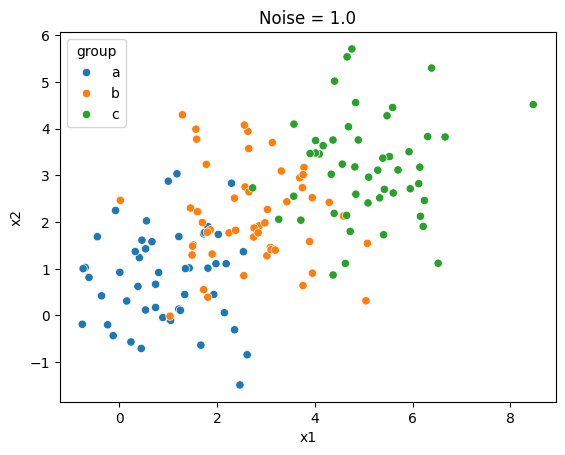

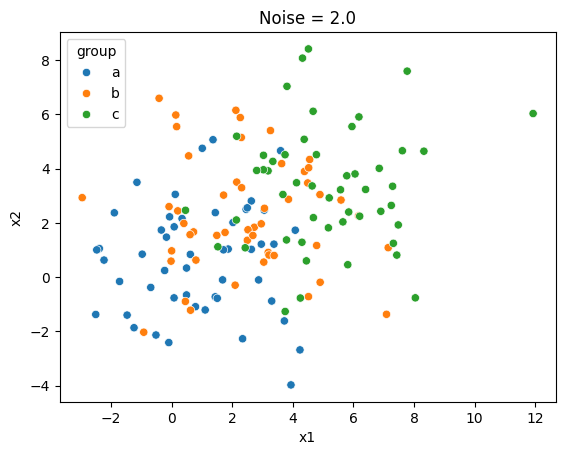

In [ ]:
#2
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplots by dataset
sns.scatterplot(x='x1', y='x2', hue='group', data=df0_125)
plt.title("Noise = 0.125")
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df0_25)
plt.title("Noise = 0.25")
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df0_5)
plt.title("Noise = 0.5")
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df1_0)
plt.title("Noise = 1.0")
plt.show()

sns.scatterplot(x='x1', y='x2', hue='group', data=df2_0)
plt.title("Noise = 2.0")
plt.show()

#As noise increases, the clusters go from tight and clearly distinct to partially overlapping
# to indistinguishable blobs.

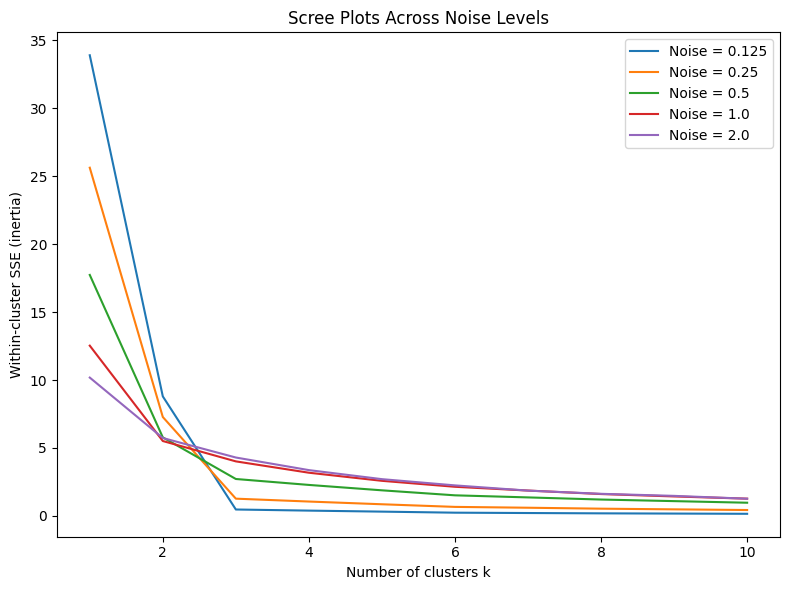

In [ ]:
#3
from sklearn.cluster import KMeans  # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

#Compute SSE curve for one dataset
def scree_for_df(df, k_bar=10):
    # scale each feature column with your maxmin
    X = df[['x1', 'x2']].apply(maxmin)
    SSE = []
    for k in range(k_bar):  #For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
        model = model.fit(X)
        SSE.append(model.inertia_)
    return np.arange(1, k_bar+1), SSE

#Compute scree curves for each dataset
k_vals_0125, sse_0125 = scree_for_df(df0_125, k_bar=10)
k_vals_025,  sse_025  = scree_for_df(df0_25,  k_bar=10)
k_vals_05,   sse_05   = scree_for_df(df0_5,   k_bar=10)
k_vals_10,   sse_10   = scree_for_df(df1_0,   k_bar=10)
k_vals_20,   sse_20   = scree_for_df(df2_0,   k_bar=10)

# All scree curves (shared y-axis)
plt.figure(figsize=(8,6))
sns.lineplot(x=k_vals_0125, y=sse_0125, label='Noise = 0.125')
sns.lineplot(x=k_vals_025,  y=sse_025,  label='Noise = 0.25')
sns.lineplot(x=k_vals_05,   y=sse_05,   label='Noise = 0.5')
sns.lineplot(x=k_vals_10,   y=sse_10,   label='Noise = 1.0')
sns.lineplot(x=k_vals_20,   y=sse_20,   label='Noise = 2.0')
plt.xlabel('Number of clusters k')
plt.ylabel('Within-cluster SSE (inertia)')
plt.title('Scree Plots Across Noise Levels')
plt.legend()
plt.tight_layout()
plt.show()

#As noise increases in datasets, the elbow flattens, making it harder to pick
# k definitively.


In [ ]:
#4
#The elbow method works when there is a clear structure in the data.
# When the noise was set to 0.125, the scree plot showed a sharp drop in SSE up to k = 3
# and then leveled off, indicating clear cluster structure, whereas at noise = 2.0 the curve
# declined smoothly with no obvious elbow, reflecting that the clusters had merged into one indistinct cloud.
#Clear elbow = clear cluster structure = easy choice of k.
#Weak or missing elbow = noisy or overlapping clusters = ambiguous k.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [8]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/2022 election cycle fundraising.csv',low_memory=False)
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].head())

def clean_money(x):
    if pd.isna(x):
        return None
    # Remove $ and commas
    x = str(x).replace("$", "").replace(",", "").strip()
    # Handle parentheses as negatives
    if x.startswith("(") and x.endswith(")"):
        x = "-" + x[1:-1]
    return float(x)

for col in ["Raised", "Spent", "Cash on Hand", "Debts"]:
    df[col] = df[col].apply(clean_money)

print(df.dtypes)
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe())

        Raised        Spent Cash on Hand Debts
0   $7,719,396   $7,449,678     $851,851    $0
1   $2,192,741   $1,243,502   $2,472,888    $0
2  $20,993,041  $13,957,854  $20,942,888    $0
3   $1,211,111   $1,173,466     $623,472    $0
4   $1,617,611   $1,664,674   $1,098,579    $0
index             int64
Member           object
Party            object
State            object
Chamber          object
Raised          float64
Spent           float64
Cash on Hand    float64
Debts           float64
dtype: object
             Raised         Spent  Cash on Hand         Debts
count  5.370000e+02  5.370000e+02  5.370000e+02  5.370000e+02
mean   3.592287e+06  2.875221e+06  1.790359e+06  1.268609e+05
std    7.376927e+06  6.332135e+06  2.804002e+06  8.426411e+05
min   -1.386356e+06  0.000000e+00 -6.478100e+04  0.000000e+00
25%    9.632370e+05  7.325080e+05  4.148470e+05  0.000000e+00
50%    1.731244e+06  1.239741e+06  9.592380e+05  0.000000e+00
75%    3.360517e+06  2.505998e+06  1.924564e+06  0.000

In [16]:
print(df.columns.tolist())

['index', 'Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'g_hat', 'Cluster']


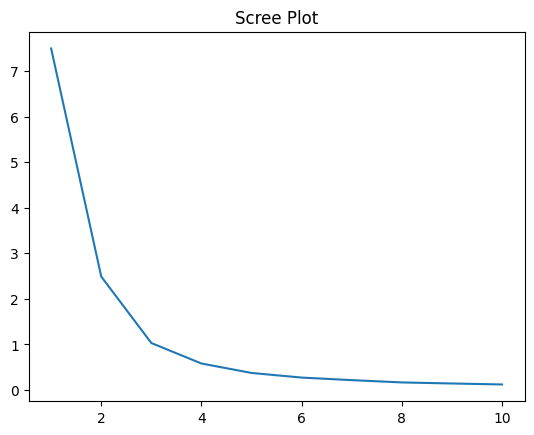

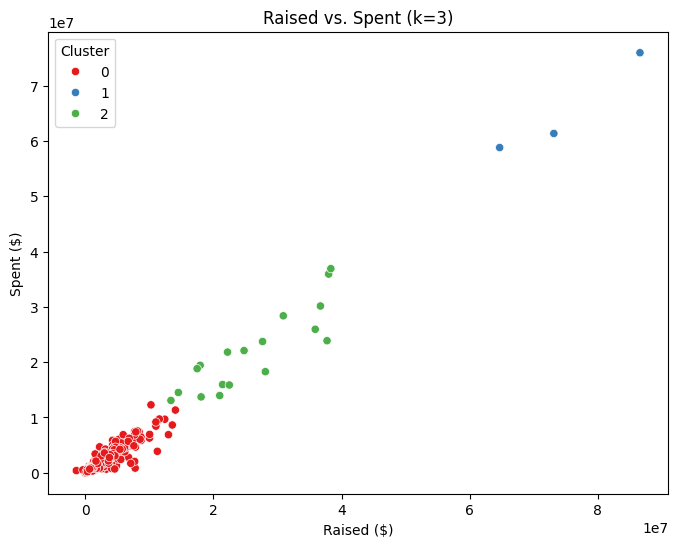

Cluster sizes:
 Cluster
1      3
2     18
0    516
Name: count, dtype: int64

Members of the two smallest clusters:
                     Member       Party           State Chamber      Raised  \
340              Mark Kelly  Democratic         Arizona  Senate  73140886.0   
523             Val Demings  Democratic         Florida   House  64682883.0   
417         Raphael Warnock  Democratic         Georgia  Senate  86581469.0   
2               Adam Schiff  Democratic      California   House  20993041.0   
290            Katie Porter  Democratic      California   House  21441693.0   
298          Kevin McCarthy  Republican      California   House  24791538.0   
390            Nancy Pelosi  Democratic      California   House  22216583.0   
357          Michael Bennet  Democratic        Colorado  Senate  18086343.0   
328             Marco Rubio  Republican         Florida  Senate  36709285.0   
414               Rand Paul  Republican        Kentucky  Senate  22490627.0   
261            

In [23]:
#2
from sklearn.cluster import KMeans

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot:
k_bar = 10
X = df[['Raised', 'Spent']].apply(maxmin)
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

k_opt = 3
model = KMeans(n_clusters=k_opt, max_iter=300, n_init=10, random_state=0)
clusters = model.fit_predict(X)
df["Cluster"] = clusters

#Create scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Raised", y="Spent", hue="Cluster", palette="Set1")
plt.title(f"Raised vs. Spent (k={k_opt})")
plt.xlabel("Raised ($)")
plt.ylabel("Spent ($)")
plt.show()


#Identify two smallest clusters
counts = df["Cluster"].value_counts().sort_values(ascending=True)
print("Cluster sizes:\n", counts)

smallest_two = counts.index[:2].tolist()

# Subset only the relevant columns you actually have
cols_to_show = ["Member", "Party", "State", "Chamber",
                "Raised", "Spent", "Cash on Hand", "Debts", "g_hat", "Cluster"]

smallest_members = df[df["Cluster"].isin(smallest_two)][cols_to_show]

print("\nMembers of the two smallest clusters:")
print(smallest_members.sort_values(["Cluster", "State", "Member"]))

#Most 2022 candidates clustered into a low-to-moderate fundraising group, while two much smaller clusters captured
# unusually high-spending races. These outlier clusters were dominated by the most nationally competitive Senate contests and
# party leaders, showing how a small number of prominent campaigns drove the cycle’s extreme fundraising and spending.



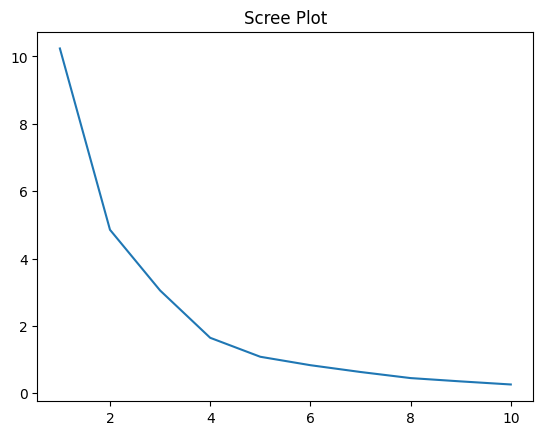

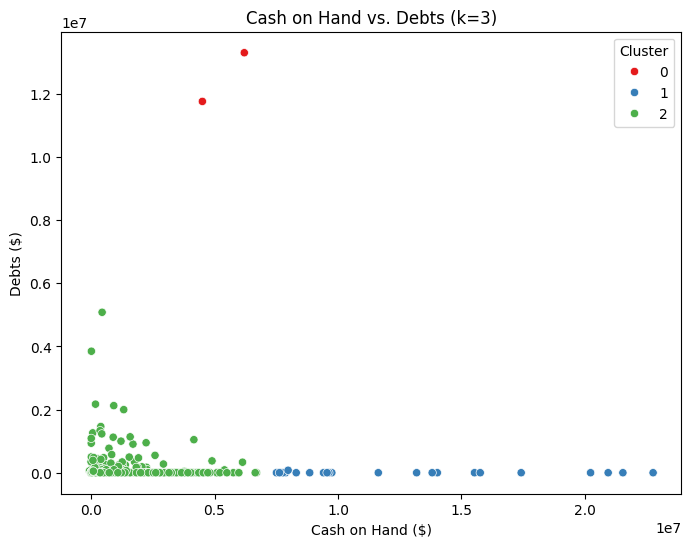

Candidates in Cluster 0 (high-debt outliers):
David Trone
Ron Johnson


In [30]:
#3
from sklearn.cluster import KMeans

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot:
k_bar = 10
X = df[['Cash on Hand', 'Debts']].apply(maxmin)
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

k_opt = 3
model = KMeans(n_clusters=k_opt, max_iter=300, n_init=10, random_state=0)
clusters = model.fit_predict(X)
df["Cluster"] = clusters

#Create scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Cash on Hand", y="Debts", hue="Cluster", palette="Set1")
plt.title(f"Cash on Hand vs. Debts (k={k_opt})")
plt.xlabel("Cash on Hand ($)")
plt.ylabel("Debts ($)")
plt.show()

# Get just the names of candidates in Cluster 0 (high-debt outliers)
cluster0_names = df.loc[df["Cluster"] == 0, "Member"].tolist()

print("Candidates in Cluster 0 (high-debt outliers):")
for name in cluster0_names:
    print(name)

#When clustering on Cash on Hand and Debts, the outliers were not the same mega-funded campaigns seen in Raised/Spent,
# but instead candidates with either unusually high debts or unusually large reserves of cash. This shift highlights that
# while fundraising totals capture campaign competitiveness, end-of-cycle cash and debt levels reveal different dynamics, like
# financial risk-taking or the ability to stockpile money for future influence.


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?